<a href="https://colab.research.google.com/github/VihaShahh/Loan-prediction-using-Machine_Learning-Python_1/blob/main/Loan_prediction_using_Machine_Learning_%26_Python_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Loan-prediction using Machine_Learning & Python_2**

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style='darkgrid')
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/1000156374.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df['Gender'] = df['Gender'].fillna( df['Gender'].dropna().mode().values[0] )
df['Married'] = df['Married'].fillna( df['Married'].dropna().mode().values[0] )
df['Dependents'] = df['Dependents'].fillna( df['Dependents'].dropna().mode().values[0] )
df['Self_Employed'] = df['Self_Employed'].fillna( df['Self_Employed'].dropna().mode().values[0] )
df['LoanAmount'] = df['LoanAmount'].fillna( df['LoanAmount'].dropna().mean() )
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna( df['Loan_Amount_Term'].dropna().mode().values[0] )
df['Credit_History'] = df['Credit_History'].fillna( df['Credit_History'].dropna().mode().values[0] )
df['Dependents'] = df['Dependents'].str.rstrip('+')
df['Gender'] = df['Gender'].map({'Female':0,'Male':1}).astype(np.int)
df['Married'] = df['Married'].map({'No':0, 'Yes':1}).astype(np.int)
df['Education'] = df['Education'].map({'Not Graduate':0, 'Graduate':1}).astype(np.int)
df['Self_Employed'] = df['Self_Employed'].map({'No':0, 'Yes':1}).astype(np.int)
df['Loan_Status'] = df['Loan_Status'].map({'N':0, 'Y':1}).astype(np.int)
df['Dependents'] = df['Dependents'].astype(np.int)

<ipython-input-4-c73dfaa9d925>:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df['Gender'] = df['Gender'].map({'Female':0,'Male':1}).astype(np.int)
<ipython-input-4-c73dfaa9d925>:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional informatio

In [5]:
df.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int64
dtype: object

In [6]:
X,y  = df.iloc[:, 1:-1], df.iloc[:, -1]

In [7]:
X= pd.get_dummies(X)

In [10]:
from sklearn.model_selection import train_test_split
from sklearn import metrics


In [12]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Rest of your code...
dtrain= pd.get_dummies(df)
import xgboost as xgb


train = dtrain
target = 'Loan_Status'
IDcol = 'Loan_ID'

In [13]:
def modelfit(alg, dtrain, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):

    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'],
                          nfold=cv_folds,metrics='auc', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])

    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['Loan_Status'],eval_metric='auc')

    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]

    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.accuracy_score(dtrain['Loan_Status'].values, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['Loan_Status'], dtrain_predprob))

    feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')

In [15]:
from xgboost import XGBClassifier


In [19]:
# Import libraries
import pandas as pd
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

# Set up Jupyter Notebook environment for inline plotting
%matplotlib inline

def modelfit(alg, dtrain, predictors, useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])

    # Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target], eval_metric='auc')

    # Predict training set
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:, 1]

    # Print model report
    print("\nModel Report")
    print(f"Accuracy : {metrics.accuracy_score(dtrain[target], dtrain_predictions)}")
    print(f"AUC Score (Train): {metrics.roc_auc_score(dtrain[target], dtrain_predprob)}")

    # Display the plot
    feat_imp = pd.Series(alg.get_booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')
    plt.show()

# Example usage:
# modelfit(xgb2, train, predictors)


In [24]:
import pandas as pd
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
import matplotlib.pyplot as plt

# Set up Jupyter Notebook environment for inline plotting
%matplotlib inline

param_test1 = {'max_depth': list(range(3, 10, 2)), 'min_child_weight': list(range(1, 6, 2))}
gsearch1 = GridSearchCV(estimator=XGBClassifier(learning_rate=0.1, n_estimators=140, max_depth=5,
                                                 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
                                                 objective='binary:logistic', nthread=4, scale_pos_weight=1, seed=27),
                       param_grid=param_test1, scoring='roc_auc', n_jobs=4, cv=5)
gsearch1.fit(train[predictors], train[target])

# Extract and print the relevant information
print("Grid Search Results:")
print("Best Parameters:", gsearch1.best_params_)
print("Best ROC-AUC Score:", gsearch1.best_score_)

# You can also explore other information in cv_results_
cv_results = gsearch1.cv_results_
print("\nCV Results:")
print(cv_results)


Grid Search Results:
Best Parameters: {'max_depth': 7, 'min_child_weight': 5}
Best ROC-AUC Score: 0.7654805565951077

CV Results:
{'mean_fit_time': array([2.43634558, 2.37546811, 2.56355944, 2.08748646, 2.05259533,
       2.2659729 , 3.53121934, 2.51348767, 2.03484273, 2.82585993,
       3.5865973 , 1.90945835]), 'std_fit_time': array([0.28514045, 0.62658946, 0.46814898, 0.17770376, 0.1705156 ,
       0.46890152, 0.28573785, 0.29469979, 0.17775472, 0.33036411,
       0.49589398, 0.36359975]), 'mean_score_time': array([0.25862513, 0.33401403, 0.30641403, 0.26886787, 0.26514649,
       0.28582788, 0.31300149, 0.27240815, 0.25028615, 0.28272247,
       0.40312901, 0.1813798 ]), 'std_score_time': array([0.04723647, 0.09563777, 0.03763946, 0.02920208, 0.03253824,
       0.04937509, 0.09209657, 0.03293593, 0.04165213, 0.05443449,
       0.0813055 , 0.08822878]), 'param_max_depth': masked_array(data=[3, 3, 3, 5, 5, 5, 7, 7, 7, 9, 9, 9],
             mask=[False, False, False, False, False, Fa

In [26]:
param_test2 = {'max_depth': [8, 9, 10], 'min_child_weight': [4, 5, 6]}
gsearch2 = GridSearchCV(estimator=XGBClassifier(learning_rate=0.1, n_estimators=140, max_depth=5,
                                                 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
                                                 objective='binary:logistic', nthread=4, scale_pos_weight=1, seed=27),
                       param_grid=param_test2, scoring='roc_auc', n_jobs=4, cv=5)
gsearch2.fit(train[predictors], train[target])
gsearch2.cv_results_, gsearch2.best_params_, gsearch2.best_score_


({'mean_fit_time': array([2.92158527, 2.87425103, 2.68746014, 2.20692072, 2.16115332,
         2.5740046 , 3.14082251, 2.09116087, 1.82856011]),
  'std_fit_time': array([0.23357157, 0.5194364 , 0.80065423, 0.06684793, 0.09608995,
         0.47915878, 0.65675514, 0.13351682, 0.33512554]),
  'mean_score_time': array([0.27944655, 0.33671346, 0.2751874 , 0.25139613, 0.22294564,
         0.35365167, 0.2874876 , 0.27552452, 0.15580292]),
  'std_score_time': array([0.08050663, 0.08294233, 0.031642  , 0.05540695, 0.02195304,
         0.0917256 , 0.05479649, 0.01965287, 0.06835134]),
  'param_max_depth': masked_array(data=[8, 8, 8, 9, 9, 9, 10, 10, 10],
               mask=[False, False, False, False, False, False, False, False,
                     False],
         fill_value='?',
              dtype=object),
  'param_min_child_weight': masked_array(data=[4, 5, 6, 4, 5, 6, 4, 5, 6],
               mask=[False, False, False, False, False, False, False, False,
                     False],
      

In [29]:
param_test2b = {'min_child_weight': [6, 8, 10, 12]}
gsearch2b = GridSearchCV(estimator=XGBClassifier(learning_rate=0.1, n_estimators=140, max_depth=8,
                                                  min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
                                                  objective='binary:logistic', nthread=4, scale_pos_weight=1, seed=27),
                        param_grid=param_test2b, scoring='roc_auc', n_jobs=4, cv=5)
gsearch2b.fit(train[predictors], train[target])
gsearch2b.cv_results_, gsearch2b.best_params_, gsearch2b.best_score_


({'mean_fit_time': array([2.51043215, 3.33419633, 2.28114595, 1.93122578]),
  'std_fit_time': array([0.48319572, 0.35672196, 0.25463756, 0.2594621 ]),
  'mean_score_time': array([0.29498138, 0.33400965, 0.24853773, 0.14018044]),
  'std_score_time': array([0.0990174 , 0.0524142 , 0.05295413, 0.04352518]),
  'param_min_child_weight': masked_array(data=[6, 8, 10, 12],
               mask=[False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'min_child_weight': 6},
   {'min_child_weight': 8},
   {'min_child_weight': 10},
   {'min_child_weight': 12}],
  'split0_test_score': array([0.76625387, 0.76594427, 0.7625387 , 0.74798762]),
  'split1_test_score': array([0.77430341, 0.76439628, 0.76160991, 0.75356037]),
  'split2_test_score': array([0.74603175, 0.745116  , 0.73351648, 0.7245116 ]),
  'split3_test_score': array([0.81746032, 0.82875458, 0.83180708, 0.83791209]),
  'split4_test_score': array([0.70018797, 0.6995614 , 0.73746867, 0.74279449]),
  '

In [31]:
param_test2c = {'min_child_weight': [6, 7]}
gsearch2c = GridSearchCV(estimator=XGBClassifier(learning_rate=0.1, n_estimators=140, max_depth=8,
                                                  min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
                                                  objective='binary:logistic', nthread=4, scale_pos_weight=1, seed=27),
                        param_grid=param_test2c, scoring='roc_auc', n_jobs=4, cv=5)
gsearch2c.fit(train[predictors], train[target])
gsearch2c.cv_results_, gsearch2c.best_params_, gsearch2c.best_score_


({'mean_fit_time': array([3.59512792, 3.94421782]),
  'std_fit_time': array([0.16797334, 0.42198565]),
  'mean_score_time': array([0.47239046, 0.51384044]),
  'std_score_time': array([0.11240715, 0.14014257]),
  'param_min_child_weight': masked_array(data=[6, 7],
               mask=[False, False],
         fill_value='?',
              dtype=object),
  'params': [{'min_child_weight': 6}, {'min_child_weight': 7}],
  'split0_test_score': array([0.76625387, 0.76068111]),
  'split1_test_score': array([0.77430341, 0.75077399]),
  'split2_test_score': array([0.74603175, 0.74969475]),
  'split3_test_score': array([0.81746032, 0.81746032]),
  'split4_test_score': array([0.70018797, 0.69580201]),
  'mean_test_score': array([0.76084746, 0.75488244]),
  'std_test_score': array([0.03824758, 0.03868825]),
  'rank_test_score': array([1, 2], dtype=int32)},
 {'min_child_weight': 6},
 0.7608474617917343)

In [33]:
param_test3 = {'gamma': [i/10.0 for i in range(0, 5)]}
gsearch3 = GridSearchCV(estimator=XGBClassifier(learning_rate=0.1, n_estimators=140, max_depth=8,
                                                 min_child_weight=6, gamma=0, subsample=0.8, colsample_bytree=0.8,
                                                 objective='binary:logistic', nthread=4, scale_pos_weight=1, seed=27),
                       param_grid=param_test3, scoring='roc_auc', n_jobs=4, cv=5)
gsearch3.fit(train[predictors], train[target])
gsearch3.cv_results_, gsearch3.best_params_, gsearch3.best_score_


({'mean_fit_time': array([3.48115373, 2.60199852, 2.07048302, 2.56357374, 2.62929912]),
  'std_fit_time': array([0.42874791, 0.41685687, 0.07667153, 0.41191838, 0.98977354]),
  'mean_score_time': array([0.29735422, 0.25207601, 0.24018903, 0.38441181, 0.20474629]),
  'std_score_time': array([0.07436679, 0.05863529, 0.00856387, 0.07414664, 0.08751452]),
  'param_gamma': masked_array(data=[0.0, 0.1, 0.2, 0.3, 0.4],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'gamma': 0.0},
   {'gamma': 0.1},
   {'gamma': 0.2},
   {'gamma': 0.3},
   {'gamma': 0.4}],
  'split0_test_score': array([0.76625387, 0.77337461, 0.7625387 , 0.77275542, 0.76687307]),
  'split1_test_score': array([0.77430341, 0.77368421, 0.76687307, 0.75294118, 0.76687307]),
  'split2_test_score': array([0.74603175, 0.75518926, 0.73992674, 0.75274725, 0.74297924]),
  'split3_test_score': array([0.81746032, 0.83089133, 0.82112332, 0.82509158, 0.82539683]),

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(



Model Report
Accuracy : 0.8094462540716613
AUC Score (Train): 0.9032262045813586


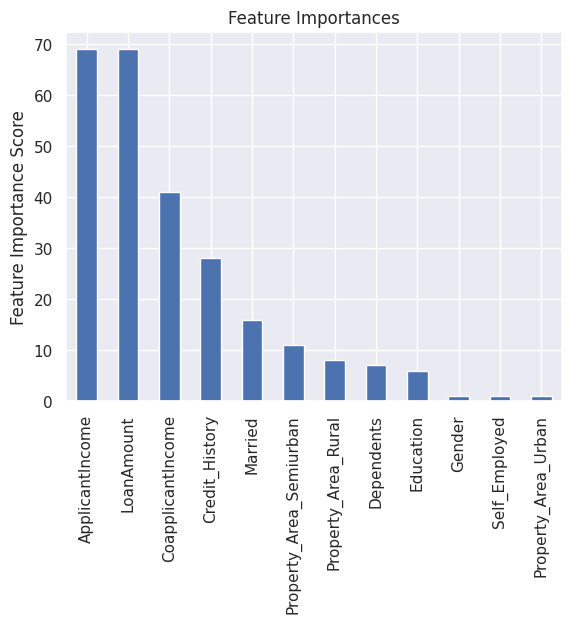

In [34]:
predictors = [x for x in train.columns if x not in [target, IDcol]]
xgb2 = XGBClassifier(learning_rate =0.1, n_estimators=1000, max_depth=8, min_child_weight=6, gamma=0.1, subsample=0.9,
                     colsample_bytree=0.95,reg_alpha=2, objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)
modelfit(xgb2, train, predictors)

In [36]:
param_test4 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch4 = GridSearchCV(estimator=XGBClassifier(learning_rate=0.1, n_estimators=177, max_depth=8,
                                                 min_child_weight=6, gamma=0, subsample=0.8, colsample_bytree=0.8,
                                                 objective='binary:logistic', nthread=4, scale_pos_weight=1, seed=27),
                       param_grid=param_test4, scoring='roc_auc', n_jobs=4, cv=5)
gsearch4.fit(train[predictors], train[target])
gsearch4.cv_results_, gsearch4.best_params_, gsearch4.best_score_


({'mean_fit_time': array([2.39455953, 2.36008463, 3.27942834, 3.15270386, 2.38089533,
         2.43692193, 3.74477205, 2.9283926 , 2.3763905 , 2.57530866,
         3.69564061, 2.66134124, 2.40017815, 2.9606719 , 3.60434012,
         2.49855275]),
  'std_fit_time': array([0.08118457, 0.10695094, 0.63270303, 0.60633408, 0.09320558,
         0.15574839, 0.79457795, 0.60523548, 0.12168689, 0.35004014,
         0.2994097 , 0.22980179, 0.10293685, 0.52623022, 0.59736508,
         0.18424262]),
  'mean_score_time': array([0.25698829, 0.24090428, 0.36249342, 0.28159418, 0.25355   ,
         0.25576077, 0.31788125, 0.24564505, 0.25817223, 0.33709741,
         0.34524879, 0.24752493, 0.24580817, 0.29763994, 0.27220259,
         0.15999517]),
  'std_score_time': array([0.04339227, 0.01501   , 0.11279071, 0.05299663, 0.01545423,
         0.03429885, 0.06844709, 0.05192668, 0.03393532, 0.09473889,
         0.10971179, 0.05208226, 0.06060938, 0.11128647, 0.05979601,
         0.05827042]),
  'param_c

In [39]:
param_test4a = {
 'subsample':[i/10.0 for i in range(9,12)],
 'colsample_bytree':[i/10.0 for i in range(9,12)]
}
gsearch4a = GridSearchCV(estimator=XGBClassifier(learning_rate=0.1, n_estimators=177, max_depth=8,
                                                  min_child_weight=6, gamma=0.1, subsample=0.8, colsample_bytree=0.8,
                                                  objective='binary:logistic', nthread=4, scale_pos_weight=1, seed=27),
                        param_grid=param_test4a, scoring='roc_auc', n_jobs=4, cv=5)

gsearch4a.fit(train[predictors], train[target])
gsearch4a.cv_results_, gsearch4a.best_params_, gsearch4a.best_score_


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
25 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/xgboost/core.py", line 729, in inner_f
    return func(**kwargs)
  File "/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py", line 1515, in fit
    self._Booster = train(
  File "/usr/local/lib/python3.10/dist-packages/xgboost/core.py", line 729, in inner_f
  

({'mean_fit_time': array([3.02544489, 3.70549793, 0.41017747, 2.53877697, 2.43636556,
         0.40852733, 0.45457253, 0.60009189, 0.62137551]),
  'std_fit_time': array([0.45956686, 0.76210729, 0.06563879, 0.17783811, 0.07989313,
         0.04174728, 0.06424047, 0.0304847 , 0.03635078]),
  'mean_score_time': array([0.34453883, 0.2091011 , 0.        , 0.28556175, 0.27496848,
         0.        , 0.        , 0.        , 0.        ]),
  'std_score_time': array([0.07586369, 0.05387091, 0.        , 0.02947353, 0.0289176 ,
         0.        , 0.        , 0.        , 0.        ]),
  'param_colsample_bytree': masked_array(data=[0.9, 0.9, 0.9, 1.0, 1.0, 1.0, 1.1, 1.1, 1.1],
               mask=[False, False, False, False, False, False, False, False,
                     False],
         fill_value='?',
              dtype=object),
  'param_subsample': masked_array(data=[0.9, 1.0, 1.1, 0.9, 1.0, 1.1, 0.9, 1.0, 1.1],
               mask=[False, False, False, False, False, False, False, False,
  

In [41]:
param_test5 = {
    'subsample': [i/100.0 for i in range(95, 105, 5)],
    'colsample_bytree': [i/100.0 for i in range(95, 105, 5)]
}
gsearch5 = GridSearchCV(estimator=XGBClassifier(learning_rate=0.1, n_estimators=177, max_depth=8,
                                                min_child_weight=6, gamma=0.1, subsample=0.8, colsample_bytree=0.8,
                                                objective='binary:logistic', nthread=4, scale_pos_weight=1, seed=27),
                       param_grid=param_test5, scoring='roc_auc', n_jobs=4, cv=5)
gsearch5.fit(train[predictors], train[target])
gsearch5.cv_results_, gsearch5.best_params_, gsearch5.best_score_


({'mean_fit_time': array([5.39533095, 3.49229064, 3.8609858 , 3.01612964]),
  'std_fit_time': array([0.79796929, 0.51208625, 0.77221645, 0.70417174]),
  'mean_score_time': array([0.33030119, 0.33418374, 0.34354501, 0.19569302]),
  'std_score_time': array([0.02966495, 0.05036163, 0.10727556, 0.06215826]),
  'param_colsample_bytree': masked_array(data=[0.95, 0.95, 1.0, 1.0],
               mask=[False, False, False, False],
         fill_value='?',
              dtype=object),
  'param_subsample': masked_array(data=[0.95, 1.0, 0.95, 1.0],
               mask=[False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'colsample_bytree': 0.95, 'subsample': 0.95},
   {'colsample_bytree': 0.95, 'subsample': 1.0},
   {'colsample_bytree': 1.0, 'subsample': 0.95},
   {'colsample_bytree': 1.0, 'subsample': 1.0}],
  'split0_test_score': array([0.78575851, 0.78297214, 0.78390093, 0.78142415]),
  'split1_test_score': array([0.76656347, 0.75820433, 0.75944272, 

In [43]:
param_test6 = {
    'reg_alpha': [1e-5, 1e-2, 0.1, 1, 100]
}
gsearch6 = GridSearchCV(estimator=XGBClassifier(learning_rate=0.1, n_estimators=177, max_depth=8,
                                                 min_child_weight=6, gamma=0.1, subsample=0.95, colsample_bytree=0.95,
                                                 objective='binary:logistic', nthread=4, scale_pos_weight=1, seed=27),
                        param_grid=param_test6, scoring='roc_auc', n_jobs=4, cv=5)
gsearch6.fit(train[predictors], train[target])
gsearch6.cv_results_, gsearch6.best_params_, gsearch6.best_score_


({'mean_fit_time': array([3.50639648, 2.96989226, 3.70088434, 2.96551647, 1.59231191]),
  'std_fit_time': array([0.20244436, 0.23900682, 0.95190621, 0.79064937, 0.38026133]),
  'mean_score_time': array([0.28510628, 0.26488776, 0.2841886 , 0.2480618 , 0.17185135]),
  'std_score_time': array([0.05670878, 0.03400345, 0.07970501, 0.04497915, 0.07122588]),
  'param_reg_alpha': masked_array(data=[1e-05, 0.01, 0.1, 1, 100],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'reg_alpha': 1e-05},
   {'reg_alpha': 0.01},
   {'reg_alpha': 0.1},
   {'reg_alpha': 1},
   {'reg_alpha': 100}],
  'split0_test_score': array([0.78575851, 0.78173375, 0.77213622, 0.77089783, 0.5       ]),
  'split1_test_score': array([0.76656347, 0.75758514, 0.76377709, 0.76996904, 0.5       ]),
  'split2_test_score': array([0.77045177, 0.76312576, 0.76709402, 0.76373626, 0.5       ]),
  'split3_test_score': array([0.84493284, 0.83608059, 0.83913309,

In [45]:
param_test6a = {
    'reg_alpha': [1, 2, 3, 4, 5]
}
gsearch6a = GridSearchCV(estimator=XGBClassifier(learning_rate=0.1, n_estimators=177, max_depth=8,
                                                  min_child_weight=6, gamma=0.1, subsample=0.95, colsample_bytree=0.95,
                                                  objective='binary:logistic', nthread=4, scale_pos_weight=1, seed=27),
                         param_grid=param_test6a, scoring='roc_auc', n_jobs=4, cv=5)
gsearch6a.fit(train[predictors], train[target])
gsearch6a.cv_results_, gsearch6a.best_params_, gsearch6a.best_score_


({'mean_fit_time': array([4.04931951, 4.04207311, 2.21694765, 2.02582726, 2.30349975]),
  'std_fit_time': array([0.56746208, 1.26520835, 0.137067  , 0.05195733, 0.37495637]),
  'mean_score_time': array([0.38093786, 0.35989213, 0.24334459, 0.23762126, 0.27982011]),
  'std_score_time': array([0.07914745, 0.08221011, 0.01976538, 0.01640309, 0.0924619 ]),
  'param_reg_alpha': masked_array(data=[1, 2, 3, 4, 5],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'reg_alpha': 1},
   {'reg_alpha': 2},
   {'reg_alpha': 3},
   {'reg_alpha': 4},
   {'reg_alpha': 5}],
  'split0_test_score': array([0.77089783, 0.75851393, 0.75139319, 0.75448916, 0.75417957]),
  'split1_test_score': array([0.76996904, 0.78080495, 0.77089783, 0.74117647, 0.73482972]),
  'split2_test_score': array([0.76373626, 0.7518315 , 0.74099512, 0.71535409, 0.69932845]),
  'split3_test_score': array([0.82814408, 0.84004884, 0.83547009, 0.82936508, 0.8220390

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(



Model Report
Accuracy : 0.8110749185667753
AUC Score (Train): 0.9083419727488151


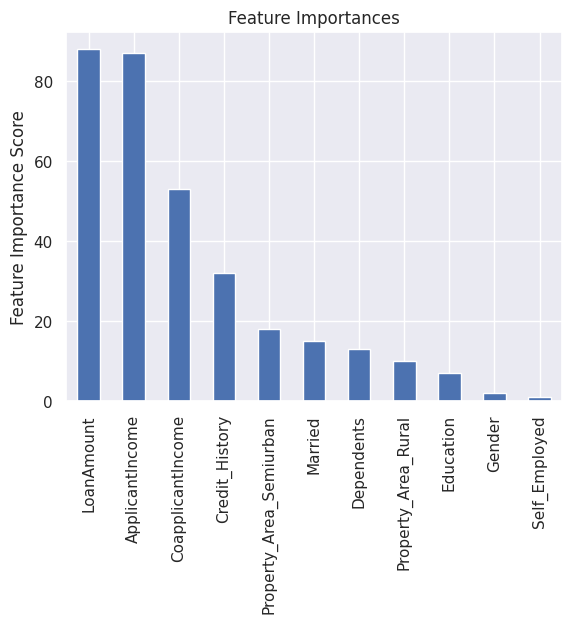

In [46]:
xgb3 = XGBClassifier(learning_rate =0.1, n_estimators=1000, max_depth=8, min_child_weight=6, gamma=0.1, subsample=0.95,
                     colsample_bytree=0.95, reg_alpha=2, objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)
modelfit(xgb3, train, predictors)

In [47]:
from sklearn.preprocessing import StandardScaler
slc= StandardScaler()
X_train_std = slc.fit_transform(X)

In [48]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators =400, criterion='entropy', oob_score=True, random_state=1,n_jobs=-1)

In [49]:
from xgboost.sklearn import XGBClassifier
#xgb1 = XGBClassifier(learning_rate =0.1, n_estimators=1000, max_depth=8, min_child_weight=6, gamma=0.1, subsample=0.95,
                     #colsample_bytree=0.95, reg_alpha=2, objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)
xgb1=XGBClassifier(learning_rate =0.1, n_estimators=1000, max_depth=8, min_child_weight=6, gamma=0.1, subsample=0.9,
                     colsample_bytree=0.95,reg_alpha=2, objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)

In [50]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy',max_depth=1)
ada = AdaBoostClassifier(base_estimator=tree, n_estimators=500, learning_rate=0.1, random_state=0)

In [51]:
from sklearn.ensemble import VotingClassifier

eclf = VotingClassifier(estimators=[('forest', forest), ('xgb', xgb1), ('adaboost', ada)], voting='hard')

In [52]:
eclf.fit(X_train_std, y)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


VotingClassifier(estimators=[('forest',
                              RandomForestClassifier(criterion='entropy',
                                                     n_estimators=400,
                                                     n_jobs=-1, oob_score=True,
                                                     random_state=1)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.95, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=N...
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=8,
                                            max_leaves=None, min_child_weight=6,
                                            missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=1000, n_jobs=None,
                                            nthread=4, num_parallel_tree=None, ...)),
                             ('adaboost',
                              AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                                                       max_depth=1),
                                                 learning_rate=0.1,
                                                 n_estimators=500,
                                                 random_state=0))])

In [53]:
dtest = pd.read_csv('/content/test_Y3wMUE5_7gLdaTN.csv')

In [54]:
dtest['Gender'] = dtest['Gender'].map({'Female':0,'Male':1})
dtest['Married'] = dtest['Married'].map({'No':0, 'Yes':1}).astype(np.int)
dtest['Education'] = dtest['Education'].map({'Not Graduate':0, 'Graduate':1}).astype(np.int)
dtest['Self_Employed'] = dtest['Self_Employed'].map({'No':0, 'Yes':1})
dtest['Dependents'] = dtest['Dependents'].str.rstrip('+')
dtest['Gender'] = dtest['Gender'].fillna( dtest['Gender'].dropna().mode().values[0]).astype(np.int)
dtest['Dependents'] = dtest['Dependents'].fillna( dtest['Dependents'].dropna().mode().values[0]).astype(np.int)
dtest['Self_Employed'] = dtest['Self_Employed'].fillna( dtest['Self_Employed'].dropna().mode().values[0])
dtest['LoanAmount'] = dtest['LoanAmount'].fillna( dtest['LoanAmount'].dropna().mode().values[0])
dtest['Loan_Amount_Term'] = dtest['Loan_Amount_Term'].fillna( dtest['Loan_Amount_Term'].dropna().mode().values[0])
dtest['Credit_History'] = dtest['Credit_History'].fillna( dtest['Credit_History'].dropna().mode().values[0] )

<ipython-input-54-ff65d19c66fb>:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtest['Married'] = dtest['Married'].map({'No':0, 'Yes':1}).astype(np.int)
<ipython-input-54-ff65d19c66fb>:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional infor

In [55]:
X_test = dtest.iloc[:,1:]

In [56]:
X_test= pd.get_dummies(X_test)

In [57]:
X_test_std = slc.transform(X_test)

In [58]:
y_test_pred = eclf.predict(X_test_std)

In [59]:
dtest['Loan_Status'] = y_test_pred
df_final = dtest.drop(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area'], axis=1)


In [60]:
df_final['Loan_Status'] = df_final['Loan_Status'].map({0:'N', 1:'Y'})

In [61]:
df_final.to_csv('my_submission7.csv', index=False)

In [62]:
df_final.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('Loan_ID').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)